# LOFAR ionospheric scintillation data tutorial part 2
Maaijke Mevius, June 2023

In this tutorial we will work with fits data. If you have not done so yet, you can download a copy of  [LOFAR_20150302_170000_CS001LBA_LBA_OUTER_Cas-A.fits](https://spaceweather.astron.nl/SolarKSP/data/atdb_process/scintillation_preview/3155/262603/fits_files/LOFAR_20150302_170000_CS001LBA_LBA_OUTER_Cas-A.fits)and [LOFAR_20230503_100000_CS032LBA_LBA_OUTER_.fits](https://spaceweather.astron.nl/SolarKSP/data/atdb_process/scintillation_preview/4603/888136/fits_files/LOFAR_20230503_100000_CS032LBA_LBA_OUTER_.fits).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

You can find some information of handling fits files in the documentation of [astropy.io.fits](https://docs.astropy.org/en/stable/io/fits/index.html). A fits file consists of one or more datasets with headers.

### Excercise:

Open the first data set, inspect the datasets and headers.  Which is the time and which the frequency axis of the `S4_60S` dataset?

In [3]:
fname = "data/LOFAR_20150302_170000_CS001LBA_LBA_OUTER_Cas-A.fits"
hdu_list = fits.open(fname)

In [4]:
hdu_list.info()

Filename: data/LOFAR_20150302_170000_CS001LBA_LBA_OUTER_Cas-A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (3467, 350)   float32   
  1  S4_60S        1 ImageHDU        16   (3410, 350)   float32   
  2  S4_180S       1 ImageHDU        16   (3294, 350)   float32   
  3  FLAG_PERCENTAGE    1 ImageHDU        16   (3467, 350)   float64   
  4  FLUX_SPECTRUM    1 ImageHDU        11   (350,)   float64   
  5  BANDPASS      1 ImageHDU        16   (3467, 350)   float64   


In [5]:
hdu_list[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3410                                                  
NAXIS2  =                  350                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'S4_60S  '           / extension name                                 
CRVAL1  =    1425315600.017041                                                  
CRPIX1  =                    0                                                  
CTYPE1  = 'Time [UT]'                                                           
CDELT1  =    1.038073262186328                                                  
CRVAL2  =             10.540

###

The fits data was generated by processing the *raw* hdf5 data that you worked with in the first part of the tutorial. The data was processed per whole hour, the time resolution has been averaged down to 1 second. For this tutorial we selected the last hour of the observation. The data is stored per station. In this case we took the first station of the list. You can inspect other image and fits data of the same observation at the [LOFAR spaceweather portal](https://spaceweather.astron.nl/SolarKSP/data/atdb_process/scintillation_preview/3155/262603/).

### Excercise:

Plot the power spectrum. This is the first (primary) dataset ("HDU") in the list. For the axis values you can generate them from the `CRVAL`, `CRPIX`, `CDELT` and `NAXIS` parameters in the header. The time format is unix. You can use [astropy.time.Time](https://docs.astropy.org/en/stable/time/index.html) for conversion.

In [6]:
data = hdu_list[0].data
freqval = hdu_list[0].header["CRVAL2"]
freqidx = hdu_list[0].header["CRPIX2"]
freqstep = hdu_list[0].header["CDELT2"]
nfreq = hdu_list[0].header["NAXIS2"]
freqs = (np.arange(nfreq) - freqidx) * freqstep + freqval

timeval = hdu_list[0].header["CRVAL1"]
timeidx = hdu_list[0].header["CRPIX1"]
timestep = hdu_list[0].header["CDELT1"]
ntime = hdu_list[0].header["NAXIS1"]
times = (np.arange(ntime) - timeidx) * timestep + timeval

In [7]:
from astropy.time import Time

In [8]:
times = Time(times, format="unix")

In [9]:
from matplotlib.dates import ConciseDateFormatter, date2num

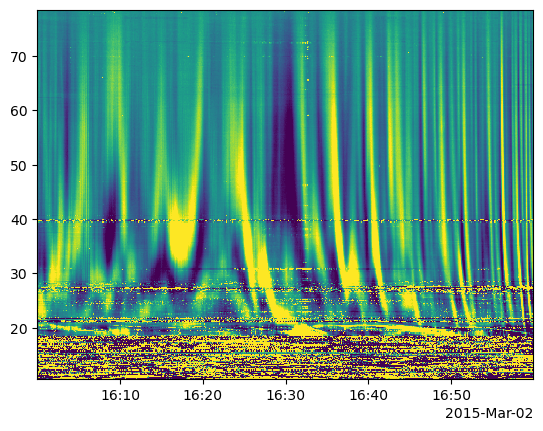

In [10]:
fig, ax = plt.subplots()
ax.imshow(
    data,
    origin="lower",
    interpolation="none",
    extent=[
        date2num(times[0].datetime),
        date2num(times[-1].datetime),
        freqs[0],
        freqs[-1],
    ],
    aspect="auto",
    vmin=0.9,
    vmax=1.1,
)
ax.xaxis_date()
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

### Excercise:

Inspect and plot the other datasets in the file.

###
Now that you have familiarised yourself with the fits format it is time to look at another interesting event. This time it is processed data from the IDOLS station.

### Excercise:

Open the second data set. Try plotting the power spectrum again. Do you notice anything peculiar in these data?

In [47]:
fname = "data/LOFAR_20230503_100000_CS032LBA_LBA_OUTER_.fits"
hdu_list = fits.open(fname)

In [54]:
data = hdu_list[0].data
freqval = hdu_list[0].header["CRVAL2"]
freqidx = hdu_list[0].header["CRPIX2"]
freqstep = hdu_list[0].header["CDELT2"]
nfreq = hdu_list[0].header["NAXIS2"]
freqs = (np.arange(nfreq) - freqidx) * freqstep + freqval

timeval = hdu_list[0].header["CRVAL1"]
timeidx = hdu_list[0].header["CRPIX1"]
timestep = hdu_list[0].header["CDELT1"]
ntime = hdu_list[0].header["NAXIS1"]
times = (np.arange(ntime) - timeidx) * timestep + timeval

In [55]:
times = Time(times, format="unix") + 2 * u.hour  # There is a bug in this data

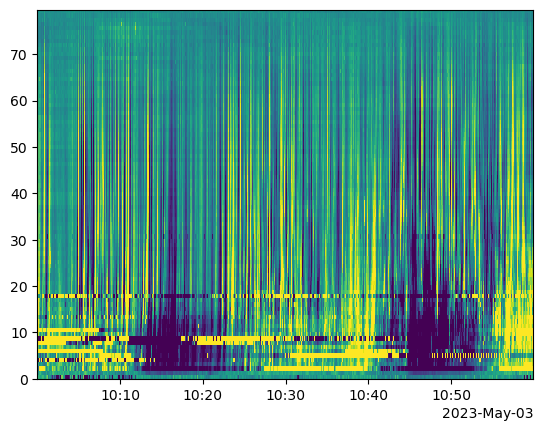

In [56]:
fig, ax = plt.subplots()
ax.imshow(
    data,
    origin="lower",
    interpolation="none",
    extent=[
        date2num(times[0].datetime),
        date2num(times[-1].datetime),
        freqs[0],
        freqs[-1],
    ],
    aspect="auto",
    vmin=0.9,
    vmax=1.1,
)
ax.xaxis_date()
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

What could those dark holes in the data be? Let's inspect some external data. In this case look at the [GOES](https://www.ngdc.noaa.gov/stp/satellite/goes-r.html) solar flux data of this specific time. The user guide of this data is [here](https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/docs/GOES-R_XRS_L2_Data_Users_Guide.pdf) (PDF).

### Excercise:

Download the GOES 1 minute X-ray flux data. ([**hint**](https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes18/l2/data/xrsf-l2-avg1m_science/2023/05/sci_xrsf-l2-avg1m_g18_d20230503_v2-2-0.nc))

You can plot the GOES data using [netCDF4](https://unidata.github.io/netcdf4-python/) (which can be installed with `pip install netCDF4`).

In [57]:
import netCDF4 as nc

In [58]:
import astropy.units as u

In [59]:
goes_data = nc.Dataset("data/sci_xrsf-l2-avg1m_g18_d20230503_v2-2-0.nc")

In [60]:
goes_flux = goes_data.variables["xrsb_flux"][:]
goes_time = Time("2000-01-01T12:00") + goes_data.variables["time"][:] * u.s

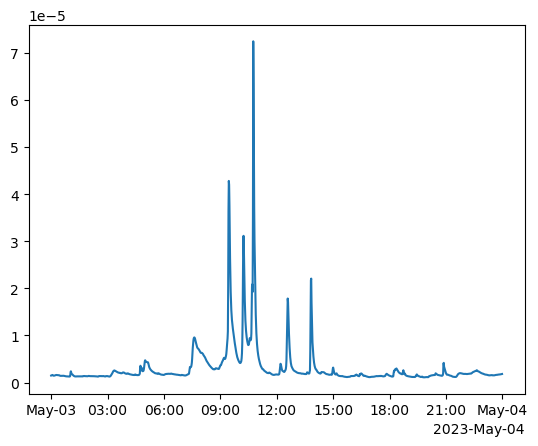

In [61]:
fig, ax = plt.subplots()
ax.plot(goes_time.datetime, goes_flux);
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_formatter()))

### Excercise:

Overlay the GOES data on top of the LOFAR spectrogram (hint: make a secondary y-axis [using](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py) ax.twinx()).

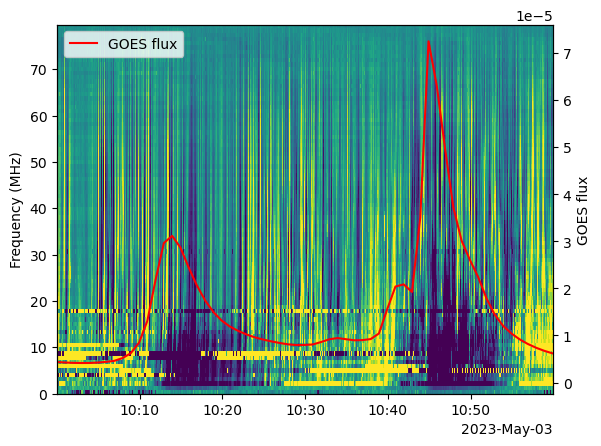

In [71]:
fig, ax = plt.subplots()
ax.imshow(
    data,
    origin="lower",
    interpolation="none",
    extent=[
        date2num(times[0].datetime),
        date2num(times[-1].datetime),
        freqs[0],
        freqs[-1],
    ],
    aspect="auto",
    vmin=0.9,
    vmax=1.1,
)
ax.xaxis_date()
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.set_ylabel("Frequency (MHz)")
xlims = ax.get_xlim()
ax2 = ax.twinx()
ax2.plot(goes_time.datetime, goes_flux, color='red', label='GOES flux');
ax2.set_xlim(xlims)
ax2.set_ylabel("GOES flux")
ax2.legend();